Cameron Selci 202046538

This was a lot of searching through the API and the notes. I avoided using numpy to practice the math involved and to get a better understanding of what was going on rather than just using numpy to do the math for me, so this took a little extra time, but it was fun.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("births.csv")
df.head()

,year,month,time
0,2022,1,12:18
1,2022,1,15:25
2,2022,1,05:39
3,2022,1,01:22
4,2022,1,18:01


In [60]:
df['time'] = df['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

births = df.groupby('time').size().reset_index(name='births')

births['angles'] = (births['time']) / 1440 * 2 * 3.14159 

births['bpmn'] = births['births']/365

births['bpmn'].describe()

count    1440.000000
mean        6.993217
std         1.728550
min         4.589041
25%         5.341781
50%         6.680822
75%         8.263014
max        13.690411
Name: bpmn, dtype: float64

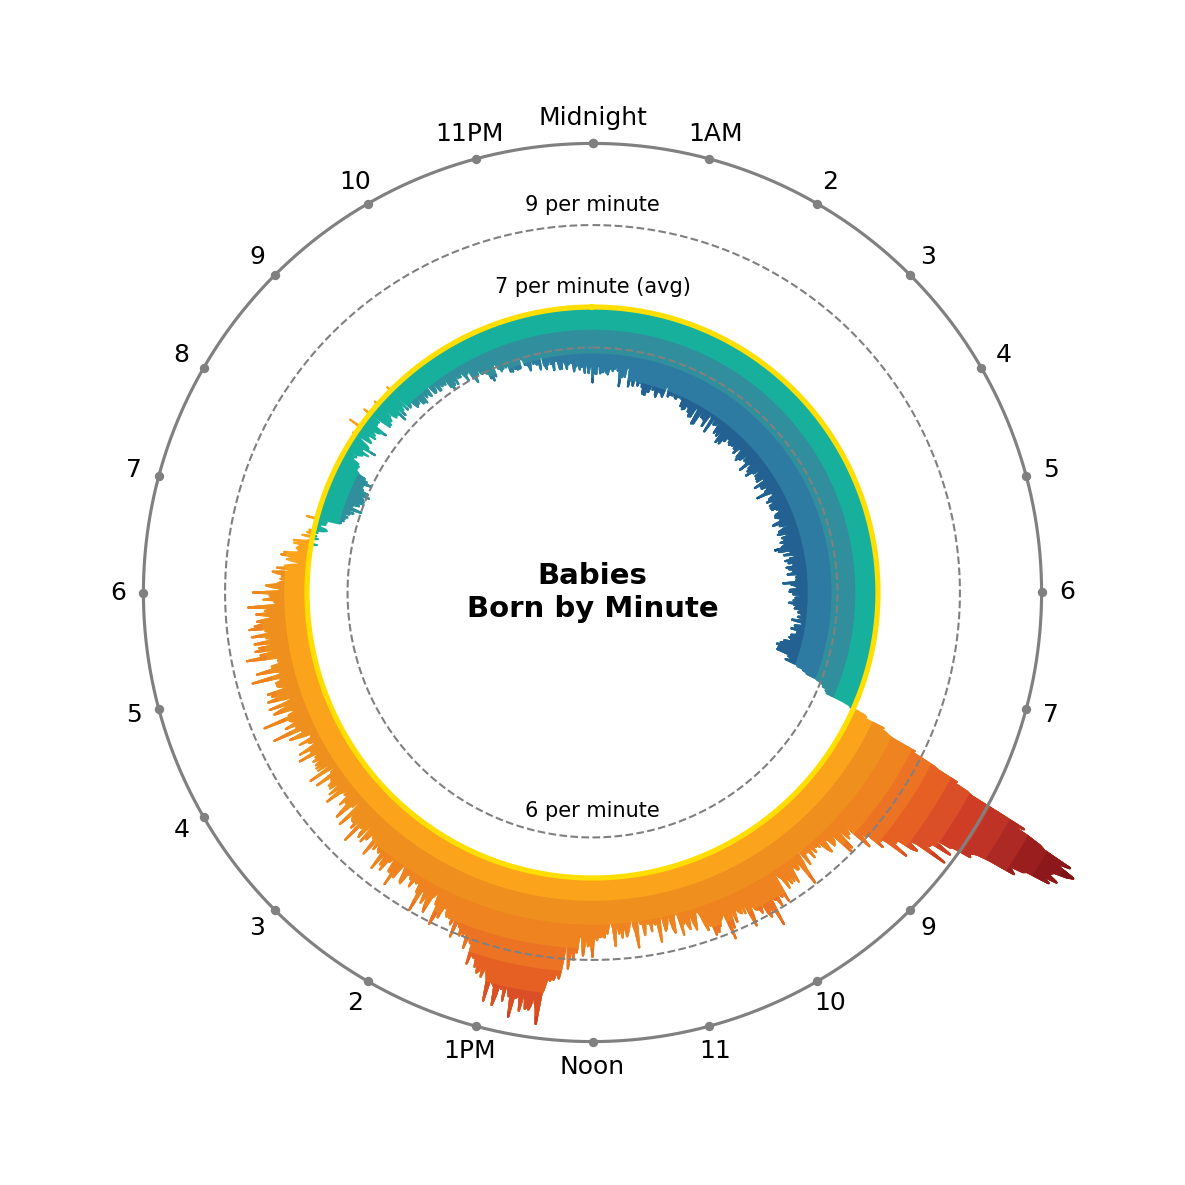

In [61]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
avg = births['bpmn'].mean()

fig.set_size_inches(10, 10)

angles = births['angles']

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1) 

ax.set_xticks([x / 24 * 2.0 * 3.14159 for x in range(24)])
ax.set_xticklabels(['Midnight', '1AM', '2', '3', '4', '5', '6', '7','','9','10','11','Noon', '1PM', '2', '3', '4', '5', '6' ,'7', '8', '9', '10', '11PM'], fontweight = 'roman')
ax.tick_params(axis='x', labelsize=12, pad = -60)
ax.set_yticklabels('')

ax.text(0, 0, 'Babies\nBorn by Minute', fontsize=14, ha='center', va='center', fontweight = 'semibold', color = 'black')

ax.spines['polar'].set_visible(False)

ax.grid(False)

inner = ['#17b09c', '#318f9d', '#2d7aa2', '#226192', '#094e81']
outer = ['#fba41b', '#ef901e', '#ee8320', '#ec7323', '#e66024', '#db4f28','#d03d26', '#be3326', '#ad2a24', '#9b1e1f', '#8d181b', '#7b1515'] 
colorpal = inner + outer

interval = (avg * 0.25)/3
track = avg
for i in range(len(inner)):
    ax.fill_between(angles, track, births['bpmn'], where = (births['bpmn'] < track ), color=inner[i], interpolate=True)
    track= track-interval

track = avg  
for i in range(len(outer)):
    ax.fill_between(angles, track, births['bpmn'], where = (births['bpmn'] >= track ), color=outer[i], interpolate=True)
    track= track+interval

marks = [None] * 24
for i in range(24):
    marks[i] = i * 60
marks[8] = 0

ax.plot(angles,len(angles) * [11], color='grey',linewidth = 1.5, marker='o', markersize=3.5, markevery=marks, zorder=3)
ax.plot(angles,len(angles)* [9], color='grey', linestyle='dashed', linewidth=1, zorder=3)
ax.text(0, 9.5, '9 per minute', fontsize=10, ha='center', va='center', fontweight = 'roman', color = 'black')
ax.plot(angles,len(angles) * [6], color='grey', linestyle='dashed', linewidth=1, zorder=3)
ax.text(3.14159, 5.5, '6 per minute', fontsize=10, ha='center', fontweight = 'roman', color = 'black')
ax.plot(angles, len(angles) * [avg], color='#ffde00', linewidth=2.5, zorder=3)
ax.text(0, avg + 0.5, '7 per minute (avg)', fontsize=10, ha='center', va='center', fontweight = 'roman', color = 'black')

fig.dpi = 150